In [1]:
from discopy.quantum.optics import factorial, npperm
def evaluate(diagram, I, J):
    assert len(I) == len(diagram.dom) and len(J) == len(diagram.cod)
    x, y, drag =  qpath_drag(diagram)
    matrix = to_matrix(drag).array
    inp, out = I[:], J[:]
    for off in x.normal_form().offsets:
        inp.insert(off, 1)
    for off in y.dagger().normal_form().offsets:
        out.insert(off, 1)
    print(f'{inp=} {out=}')
    if sum(inp) != sum(out):
        raise ValueError('# of photons in != # of photons out')
    n_modes_in = len(drag.dom)
    n_modes_out = len(drag.cod)
    matrix = np.stack([matrix[:, i] for i in range(n_modes_out)
                      for _ in range(out[i])], axis=1)
    matrix = np.stack([matrix[i] for i in range(n_modes_in)
                      for _ in range(inp[i])], axis=0)
    divisor = np.sqrt(np.prod([factorial(n) for n in inp + out]))
    return npperm(matrix) / divisor

In [2]:
import pyzx as zx
import pyzx

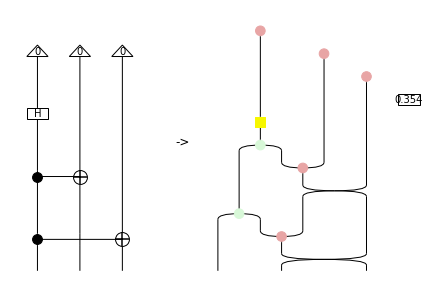

In [3]:
from discopy.quantum import *
from discopy.quantum.zx import *
from discopy import drawing

circ = Ket(0, 0, 0).H(0).CX(0, 1).CX(0, 2)
zx_circ = circuit2zx(circ)
drawing.equation(circ, zx_circ, symbol='->')

In [4]:
g = zx_circ.to_pyzx()
pyzx.drawing.draw_d3(g)
pyzx.clifford_simp(g)
pyzx.drawing.draw_d3(g)

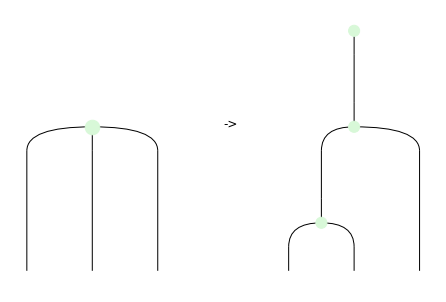

In [5]:
from discopy.quantum.zx import Z
ghz = Z(0, 3)
decomp_ghz = decomp(ghz)
drawing.equation(ghz, decomp_ghz, symbol='->')

## Dual Rail Encoding of GHZ state

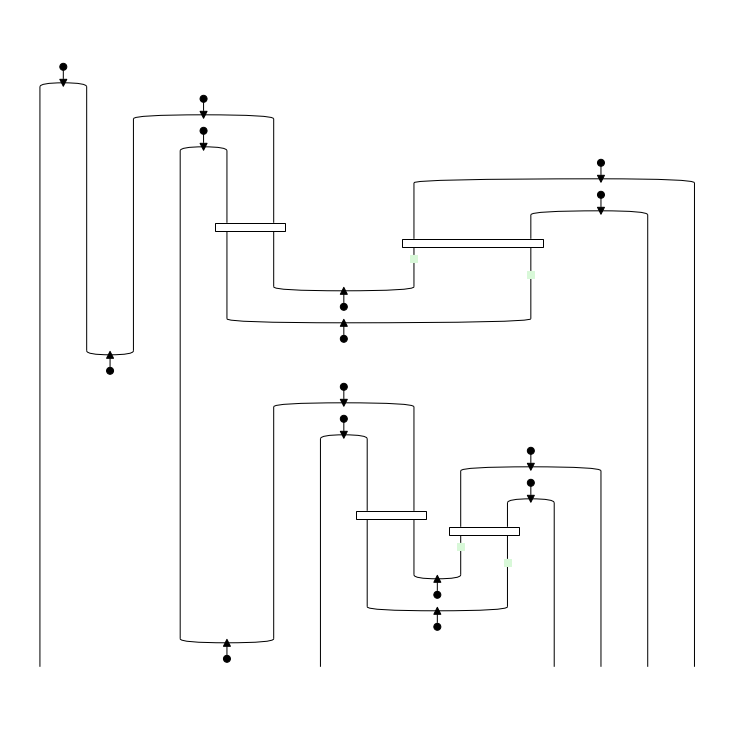

In [6]:
from discopy.quantum.optics import *
path_ghz = zx_to_path(decomp_ghz)
path_ghz.draw(draw_box_labels=False, draw_type_labels=False, figsize=(10, 10))

In [7]:
evaluate(path_ghz, [], [0, 1, 0, 1, 0, 1])

inp=[1, 1, 1, 1, 1, 1, 1, 1, 1] out=[0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1]


(1+0j)

## Dual Rail Encoding of Bell state

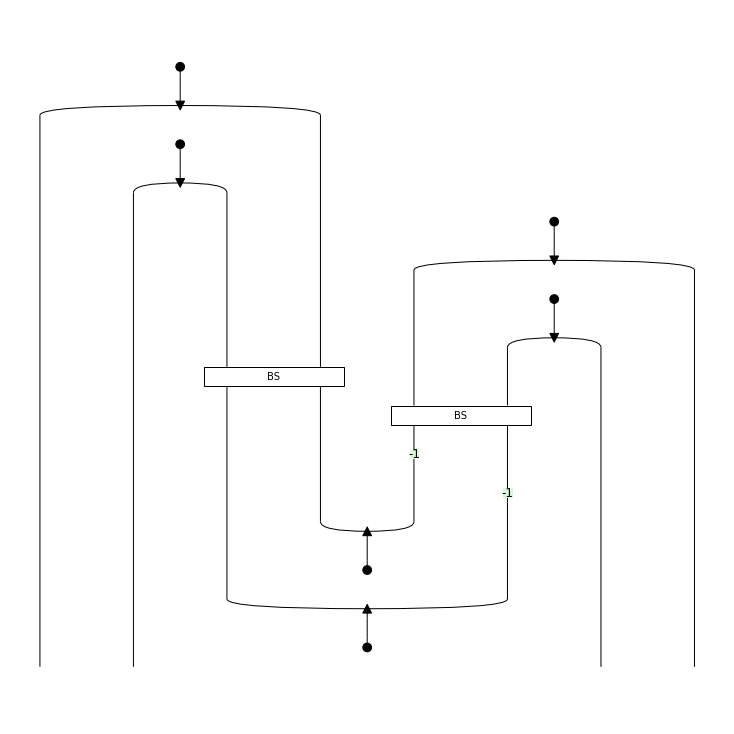

In [8]:
from discopy.quantum.optics import *
path_bell = zx_to_path(Z(0, 2))
path_bell.draw(draw_type_labels=False, figsize=(10, 10))

In [9]:
evaluate(path_bell, [], [1, 0, 1, 0])

inp=[1, 1, 1, 1] out=[1, 0, 1, 1, 1, 0]


(1+0j)

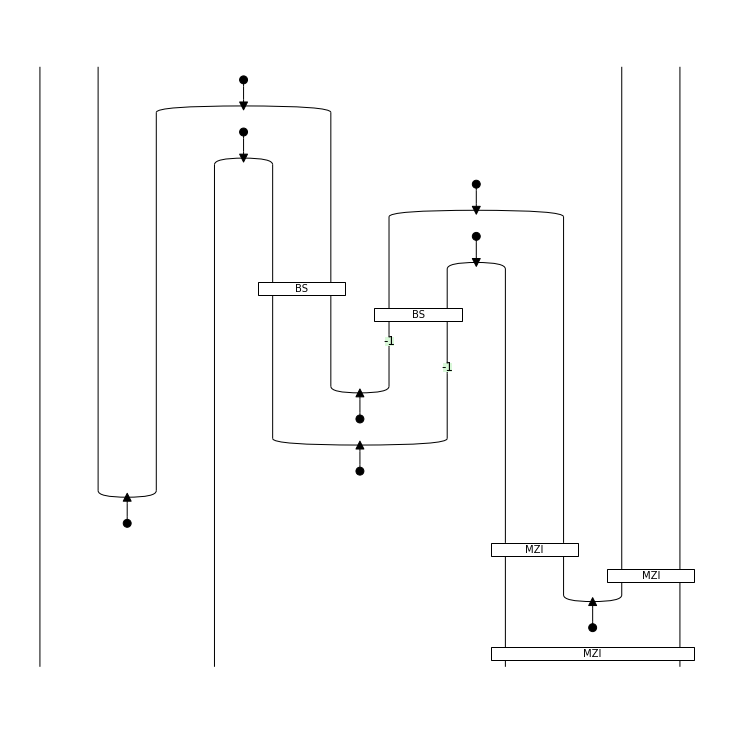

In [10]:
from discopy import CX
circ = CX
d_path = zx_to_path(decomp(circuit2zx(CX)))

d_path.draw(draw_type_labels=False, figsize=(10, 10))

In [11]:
evaluate(d_path, [0, 1, 1, 0], [0, 1, 0, 1])

inp=[0, 1, 1, 1, 1, 1, 1, 0] out=[0, 1, 1, 1, 1, 0, 1, 1]


(0.7071067811865476+0j)